Ellipsis

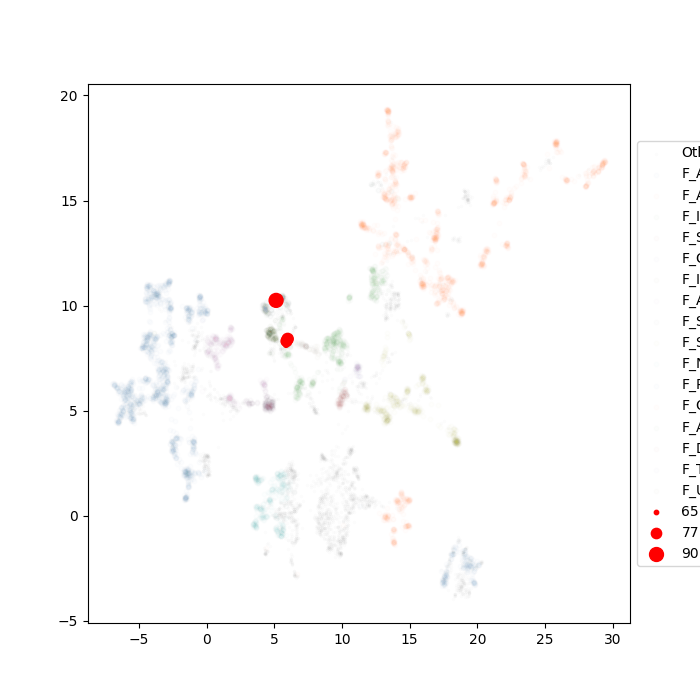

In [16]:

    
    @classmethod
    def compare_two_methods(cls, languages, score_diff, method_names):
        
        colors = ['g' if s > 0 else 'r' for s in score_diff]
        scores = [s if s > 0 else -s for s in score_diff]
        mx, mn = max(scores), min(scores)
        scores = [s - min(scores) for s in scores]  # normalization
        scores = [s / max(scores) for s in scores]  # normalization
        sizes = [s * 90 + 10 for s in scores]  # 20-100 scale
        
        method_a, method_b = method_names
        legend = {
            'labels': [
                f'{method_a} wins by {mx}',
                f'{method_a} wins by {(mx + mn) / 2}',
                f'{method_a} wins by {mn}',
                f'{method_b} wins by {mn}',
                f'{method_b} wins by {(mx + mn) / 2}',
                f'{method_b} wins by {mx}',
            ],
            'colors': ['g', 'g', 'g', 'r', 'r', 'r'],
            'sizes': [100, 55, 10, 10, 55, 100],
        }
        
        return Evaluation(
            languages=languages,
            sizes=sizes,
            colors=colors,
            legend=legend,
        )
        
    @classmethod
    def show_winner(cls, languages, winners):
        methods = list(set(winners))
        cm = matplotlib.cm.get_cmap('tab20').colors
        cm = cm[::2] + cm[1::2]
        
        legend = {
            'labels': methods,
            'colors': cm[:len(methods)],
            'sizes': [50 for _ in range(len(methods))],
        }
        
        return Evaluation(
            languages=languages,
            sizes=50,
            colors=[cm[methods.index(w)] for w in winners],
            legend=legend,
        )
        
    @classmethod
    def show_performance(cls, languages, scores, color='r'):  # scores should be scaled by user and with max being better
        mn, mx = min(scores), max(scores)
        scores = [s - min(scores) for s in scores]  # normalization
        scores = [s / max(scores) for s in scores]  # normalization
        sizes = [s * 90 + 10 for s in scores]  # 20-100 scale
        
        legend = {
            'labels': [
                f'{mn}',
                f'{(mx + mn) / 2}',
                f'{mx}',
            ],
            'colors': [color, color, color],
            'sizes': [10, 55, 100],
        }
        
        # TODO: legend
        return Evaluation(
            languages=languages,
            sizes=sizes,
            colors=color,
            legend=legend,
        )

In [ ]:
import umap.plot
import bokeh

hover_data = pd.DataFrame({
    'family': df['family_str'],
    'iso': df.index,
    'name': df['name'],
})
hover_data.index = range(7970)

p = umap.plot.interactive(
    umap_object,
    hover_data=hover_data,
    interactive_text_search=True,
    point_size=4,
)
bokeh.plotting.output_notebook() 
bokeh.plotting.show(p)

In [ ]:
import numpy as np
from types import FunctionType
from utils import language_iso

@language_iso
def rahimi_ner():
    languages = [line.split()[0] for line in open('./papers/rahimi_ner.txt')]
    scores = np.vstack([
        [float(v) for v in line.split()[2:]]
        for line
        in open('./papers/rahimi_ner.txt')
    ])
    return languages, scores

@language_iso
def heinzerling_ner():
    languages = [line.split()[0] for line in open('./papers/heinzerling_ner.txt')]
    scores = np.vstack([
        [float(v) for v in line.split()[1:]]
        for line
        in open('./papers/heinzerling_ner.txt')
    ])
    return languages, scores

@language_iso
def heinzerling_pos():
    languages = [line.split()[0] for line in open('./papers/heinzerling_pos.txt')]
    scores = np.vstack([
        [float(v) for v in line.split()[1:]]
        for line
        in open('./papers/heinzerling_pos.txt')
    ])
    return languages, scores


In [ ]:
languages = [line.split()[0] for line in open('./papers/heinzerling_ner.txt')]
languages

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'uriel_codes' is not defined

In [106]:
from main import LinguisticDatabase

ldb = LinguisticDatabase().load()
ldb.fields.keys()

loading URIEl
loading geo
loading family
loading names


dict_keys(['uriel', 'uriel_umap', 'geo', 'family'])

In [169]:
from linguistic_database import LinguisticDatabase

ldb = LinguisticDatabase().load()

2022-12-07 08:11:21,070 - linguistic_database - INFO - Loading Linguistic Databse. This might take a minute.
2022-12-07 08:11:21,072 - linguistic_database - INFO - Loading URIEL features.
2022-12-07 08:13:20,932 - linguistic_database - INFO - Loading geographical features.
2022-12-07 08:13:21,118 - linguistic_database - INFO - Loading family features.
2022-12-07 08:14:17,625 - linguistic_database - INFO - Loading language names.
2022-12-07 08:14:17,668 - linguistic_database - INFO - Loading done.


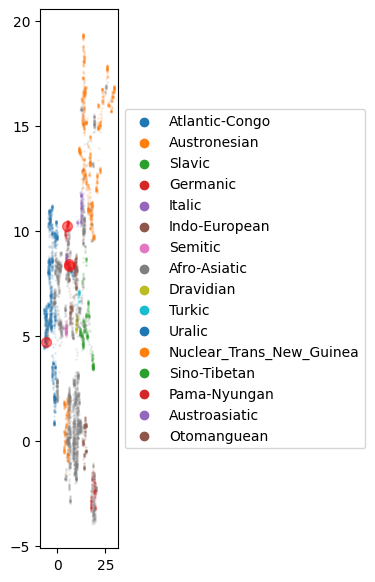

In [174]:
%matplotlib inline


from visualization import Visualization
vis = Visualization(feature='uriel', size=(1,7), zoom=None, backend='matplotlib', ldb=ldb).load()
vis.show_all_languages(color_families=True, label_families=True, s=1, alpha=0.1)
vis.show_languages(['sk', 'cs', 'en', 'zul'])
vis.finish()